Question 1.1)

In [2]:
import pandas as pd
import numpy as np
! git clone https://github.com/DS3001/assignment4
cars = pd.read_csv('./assignment4/data/cars_hw.csv')
#print(cars.head(15))
#OKAY so I am confused about how the price variable and how to scale this into comprehensible terms
cars['Cost'] = np.log(cars['Price'])
print(cars['Cost'].describe())
print(cars['Price'].describe())
print(cars.head(10))
# I created a new variable called Cost which is the price variable with a log transformation performed

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 2.13 MiB/s, done.
count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Cost, dtype: float64
count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  b

Question 1.2)

count    976.000000
mean      13.411033
std        0.450276
min       12.144197
25%       13.072647
50%       13.409795
75%       13.691080
max       14.894260
Name: Cost, dtype: float64


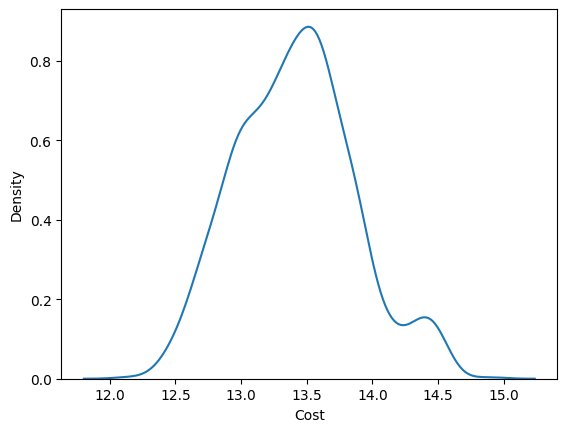

In [3]:
#interpreting summarize the variable as to compute the 5 number summary
var = 'Cost'
import seaborn as sns
sns.kdeplot(cars[var])
print(cars[var].describe())

We see that the log transformation of the price variable, which becomes a growth percentage rate, reaches a peak density around 13.5 percent.

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  293.0  13.218132  0.371409  12.375815  12.926348  13.174956   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

<Axes: xlabel='Cost', ylabel='Density'>

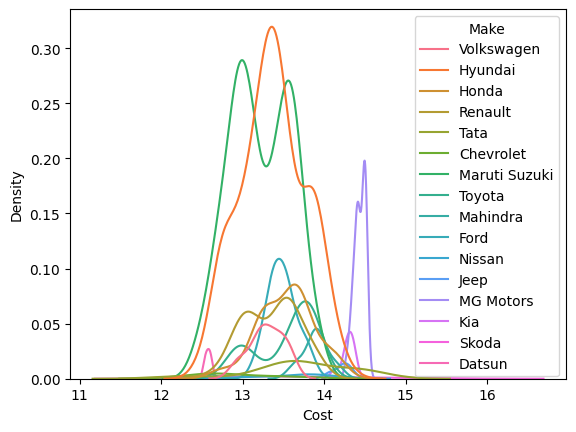

In [4]:
# going to group the data
car_models = cars.groupby('Make')
print(car_models[var].describe())
# going to make a grouped kernel density plot now
var1 = 'Make'
sns.kdeplot(data = cars, x = var, hue = var1)
#print(car_models.head(10))

The car brands that appear the most expensive are Maruti Suzuki and Hyundai. The prices, now growth rate, seem to be concentrated primarily between 13 and 14 percent.
# growth rates and use percentages

Question 1.3)

In [5]:
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

In [6]:
y = cars['Cost']
droppers = ['Cost','Price']
X = cars.drop(droppers, axis = 1)
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,test_size=.2,random_state = 100)

Question 1.4)

In [7]:
# only use numerical variables which are - Mileage_Run, Make_year, Seating_Capacity
# remember this is multiple linear regression
#print(y)
cars_x = cars.loc[:,['Mileage_Run','Make_Year','Seating_Capacity']]
#print(cars_x)
# COME BACK AND PRINT THE RMSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
numeric_model = LinearRegression().fit(cars_x,y)
print(numeric_model.intercept_)
print(numeric_model.coef_)
print(numeric_model.score(cars_x,y))
# calculating the RMSE
predictions = numeric_model.predict(cars_x)
n_rmse = np.sqrt(mean_squared_error(y,predictions))
print(n_rmse)

-227.33565172865835
[4.54325902e-06 1.19045238e-01 8.79170114e-02]
0.4108323018497545
0.34544250478166144


The R-squared for the model that only uses the numerical variables set is 0.411, while the RMSE is 0.345.
# come back and add a source


In [8]:
# only categorical variables
#cars_cx = cars.loc[:,['Body_Type','Make','Color','Fuel_Type','Transmission','Transmission_Type','No_of_Owners']]
# one hot encoding:
new_cars1 = pd.get_dummies(X['Body_Type'],dtype='int',drop_first=True)
new_cars2 = pd.get_dummies(X['Make'],dtype='int',drop_first=True)
new_cars3 = pd.get_dummies(X['Color'],dtype='int',drop_first=True)
new_cars4 = pd.get_dummies(X['Fuel_Type'],dtype='int',drop_first=True)
new_cars5 = pd.get_dummies(X['Transmission'],dtype='int',drop_first=True)
new_cars6 = pd.get_dummies(X['Transmission_Type'],dtype='int',drop_first=True)
new_cars7 = pd.get_dummies(X['No_of_Owners'],dtype='int',drop_first=True)
cars_cx = pd.concat([new_cars1, new_cars2, new_cars3, new_cars4, new_cars5, new_cars6, new_cars7], axis=1)
#print(cars_cx)
categorical_model = LinearRegression().fit(cars_cx,y)
print(categorical_model.intercept_)
print(categorical_model.coef_)
print(categorical_model.score(cars_cx,y))
# doing the RMSE
predictions1 = categorical_model.predict(cars_cx)
rmse1 = np.sqrt(mean_squared_error(y,predictions1))
print(rmse1)


12.776861458574217
[-0.27085642 -0.07517176  0.07005805  0.16425366  0.01379757  0.46451865
  0.60168464  0.53179143  0.76286434  0.94398969  1.15881658  0.62084718
  0.48042358  0.60724036  0.45329608  0.47299263  0.72974385  0.70932664
  0.42915139  0.13184892  0.32658231  0.12405427  0.25673825  0.20406594
  0.10488142  0.23619169  0.10943514  0.25610017 -0.30359146  0.22187256
  0.17312635  0.23641752  0.21901088 -0.15121329  0.16380628  0.13019276
  0.31779346  0.59956545  0.29951572 -0.10363936 -0.13744976 -0.24945382]
0.6865270275709643
0.2519743659226446


The R-squared for the model that only uses the categorical variables is 0.687, while the RMSE is 0.252.

In [9]:
#creating a joint model
cars_jx = pd.concat([cars_cx,cars_x],axis = 1)
#print(cars_jx.head(10))
joint_model = LinearRegression().fit(cars_jx,y)
print(joint_model.intercept_)
print(joint_model.coef_)
print(joint_model.score(cars_jx,y))
# calculating the RMSE
predictions2 = joint_model.predict(cars_jx)
rmse2 =np.sqrt(mean_squared_error(y,predictions2))
print(rmse2)

-132.57325660976403
[-1.74194853e-01 -2.97398420e-01  1.16903342e-01  2.34276952e-01
 -1.27429202e-01  2.00847723e-01  3.95729580e-01  3.71403159e-01
  5.63197736e-01  6.59619431e-01  7.22207273e-01  1.00537346e-01
  2.83718663e-01  1.97062002e-01  1.00698442e-01  5.26599269e-01
  2.96203284e-01  4.52944732e-01  3.40815463e-01  1.61930574e-01
  1.65719504e-01  5.28359184e-02  1.58206643e-01  1.96412289e-01
  1.86991706e-01  1.03404789e-01  1.78164946e-01  1.66828335e-01
 -1.48010485e-01  1.26931766e-01  1.14297147e-01  1.29464170e-01
  1.13357029e-01 -2.06459062e-01 -2.72771663e-01  7.20222475e-02
  1.85859449e-01  3.29564805e-01  1.38952172e-01 -7.77204818e-02
 -5.33075814e-02 -1.73262530e-01 -1.42717153e-07  7.17900109e-02
  1.76091458e-01]
0.8328331119515983
0.18400576880689978


The R-squared for the combined model is 0.833, while the RMSE is 0.184.

When soley comparing the categorical and numerical variable models we see that the the categorical model has a higher R-Squared and lower RMSE. The r-squared value for the categorical model is 0.68, which informs that the model acocunts for 68% of the variance in comparison to the numerical model only accounting for 41% of the variance. On the other hand the smaller RMSE of 0.252 for the categorical model informs us that the categorical model has a smaller prediction error than the numerical model. Lastly, the joint model performs the best with a R-squared value of 0.833 meaning that the model accounts for 83% of the variation in the model.

Question 1.5)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
# going to split the cars_x data


expander = PolynomialFeatures(degree=5,include_bias=False)

Z = expander.fit_transform(cars_x)
names = expander.get_feature_names_out()
two_expanded = pd.DataFrame(data = Z, columns = names)
print(two_expanded.head(10))
mod = LinearRegression().fit(two_expanded,y)
print(mod.score(two_expanded,y))



   Mileage_Run  Make_Year  Seating_Capacity  Mileage_Run^2  \
0      44611.0     2017.0               5.0   1.990141e+09   
1      20305.0     2016.0               5.0   4.122930e+08   
2      29540.0     2019.0               5.0   8.726116e+08   
3      35680.0     2017.0               5.0   1.273062e+09   
4      25126.0     2017.0               5.0   6.313159e+08   
5      52261.0     2016.0               5.0   2.731212e+09   
6      28108.0     2012.0               5.0   7.900597e+08   
7      92603.0     2019.0               5.0   8.575316e+09   
8      16304.0     2021.0               5.0   2.658204e+08   
9      26350.0     2019.0               5.0   6.943225e+08   

   Mileage_Run Make_Year  Mileage_Run Seating_Capacity  Make_Year^2  \
0             89980387.0                      223055.0    4068289.0   
1             40934880.0                      101525.0    4064256.0   
2             59641260.0                      147700.0    4076361.0   
3             71966560.0         

In [11]:
expands = PolynomialFeatures(degree=10,include_bias=False)

A = expands.fit_transform(cars_x)
names2 = expands.get_feature_names_out()
two_expanded2 = pd.DataFrame(data = A, columns = names2)
print(two_expanded2.head(10))
mod2 = LinearRegression().fit(two_expanded2,y)
print(mod2.score(two_expanded2,y))


   Mileage_Run  Make_Year  Seating_Capacity  Mileage_Run^2  \
0      44611.0     2017.0               5.0   1.990141e+09   
1      20305.0     2016.0               5.0   4.122930e+08   
2      29540.0     2019.0               5.0   8.726116e+08   
3      35680.0     2017.0               5.0   1.273062e+09   
4      25126.0     2017.0               5.0   6.313159e+08   
5      52261.0     2016.0               5.0   2.731212e+09   
6      28108.0     2012.0               5.0   7.900597e+08   
7      92603.0     2019.0               5.0   8.575316e+09   
8      16304.0     2021.0               5.0   2.658204e+08   
9      26350.0     2019.0               5.0   6.943225e+08   

   Mileage_Run Make_Year  Mileage_Run Seating_Capacity  Make_Year^2  \
0             89980387.0                      223055.0    4068289.0   
1             40934880.0                      101525.0    4064256.0   
2             59641260.0                      147700.0    4076361.0   
3             71966560.0         

In [12]:
expandss = PolynomialFeatures(degree=50,include_bias=False)

B = expandss.fit_transform(cars_x)
names22 = expandss.get_feature_names_out()
two_expanded22 = pd.DataFrame(data = B, columns = names22)
print(two_expanded22.head(10))
mod22 = LinearRegression().fit(two_expanded22,y)
print(mod22.score(two_expanded22,y))


   Mileage_Run  Make_Year  Seating_Capacity  Mileage_Run^2  \
0      44611.0     2017.0               5.0   1.990141e+09   
1      20305.0     2016.0               5.0   4.122930e+08   
2      29540.0     2019.0               5.0   8.726116e+08   
3      35680.0     2017.0               5.0   1.273062e+09   
4      25126.0     2017.0               5.0   6.313159e+08   
5      52261.0     2016.0               5.0   2.731212e+09   
6      28108.0     2012.0               5.0   7.900597e+08   
7      92603.0     2019.0               5.0   8.575316e+09   
8      16304.0     2021.0               5.0   2.658204e+08   
9      26350.0     2019.0               5.0   6.943225e+08   

   Mileage_Run Make_Year  Mileage_Run Seating_Capacity  Make_Year^2  \
0             89980387.0                      223055.0    4068289.0   
1             40934880.0                      101525.0    4064256.0   
2             59641260.0                      147700.0    4076361.0   
3             71966560.0         

In [13]:
expandsss = PolynomialFeatures(degree=61,include_bias=False)

C= expandsss.fit_transform(cars_x)
names222 = expandsss.get_feature_names_out()
two_expanded222 = pd.DataFrame(data = C, columns = names222)
print(two_expanded222.head(10))
mod222 = LinearRegression().fit(two_expanded222,y)
print(mod222.score(two_expanded222,y))

   Mileage_Run  Make_Year  Seating_Capacity  Mileage_Run^2  \
0      44611.0     2017.0               5.0   1.990141e+09   
1      20305.0     2016.0               5.0   4.122930e+08   
2      29540.0     2019.0               5.0   8.726116e+08   
3      35680.0     2017.0               5.0   1.273062e+09   
4      25126.0     2017.0               5.0   6.313159e+08   
5      52261.0     2016.0               5.0   2.731212e+09   
6      28108.0     2012.0               5.0   7.900597e+08   
7      92603.0     2019.0               5.0   8.575316e+09   
8      16304.0     2021.0               5.0   2.658204e+08   
9      26350.0     2019.0               5.0   6.943225e+08   

   Mileage_Run Make_Year  Mileage_Run Seating_Capacity  Make_Year^2  \
0             89980387.0                      223055.0    4068289.0   
1             40934880.0                      101525.0    4064256.0   
2             59641260.0                      147700.0    4076361.0   
3             71966560.0         

I attempted incrementing the degrees until I reached a negative R-square however the highest number I could reach was 61 degrees without receiving an error that stated: "ValueErro: Input X contains infinity or a value too large for dtype('float64').". The corresponding R-squared for 61 degrees is 0.021. Interestingly, as you increase the degree of expansion the R-Squared value becomes smaller indicating that the model is becoming worse at accounting for the variance with the data set. My best model has the lowest number of expansions which was 5. 5 degrees expanded is thought to be the best model due to its r-squared value being the highest at around 0.45. Lastly, my best model with 5 degrees expanded does worse than my previous best model which was the joint model that combined the categorical and numerical variables. For a direct comparison, the joint model had a r-sqaured of .83, therefore the joint model account for about 40% more variance than the 5 degree expanded model.

Question 1.6)

My best model was my joint model therefore I am going to use that model moving forward.

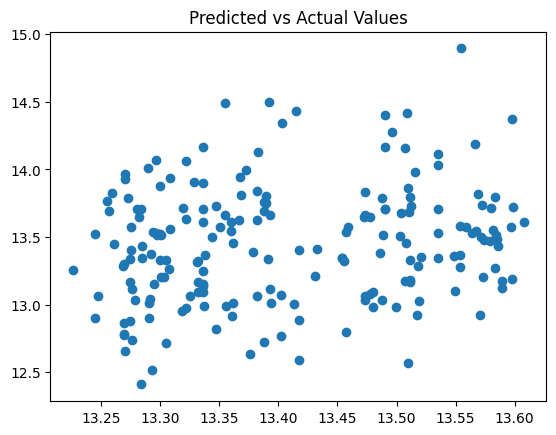

In [21]:
# plot predicted vs actual
# compute the residuals
#create a kernel density plot
# my variables is called predictions2

# splitting my data set again
from sklearn.model_selection import train_test_split
X_Trainer, X_Tester, Y_Trainer, Y_Tester = train_test_split(cars_jx, y, test_size=0.2, random_state=50)
TSS = np.sum( (Y_Tester - Y_Trainer.mean())**2 )
N_test = len(Y_Test)


from sklearn.neighbors import KNeighborsRegressor
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_Trainer,Y_Trainer) # Train the model on our data
    y_hat = fitted_model.predict(X_Tester) # Predict values for test set
    SSE[k] = np.sum( (Y_Tester-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

# ploting predicted vs actual
import matplotlib.pyplot as plt
plt.scatter(x=y_hat, y= Y_Tester)
plt.title("Predicted vs Actual Values")
plt.show()








The predicted values somewhat line up in a positive direction but there is great variation so it I would say the diagonal relationship is weak to moderate. This weak diagonal relationship informs us that that our predicted variables are not very accurate.

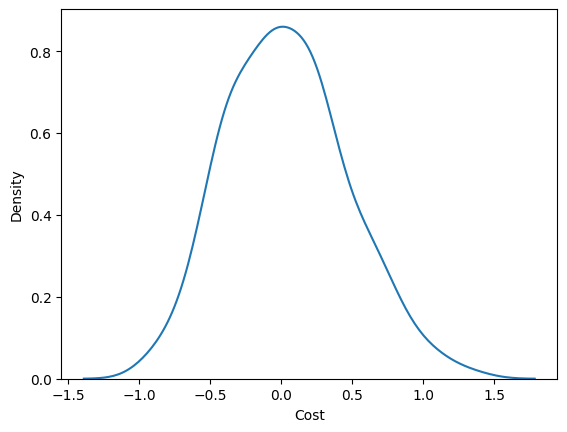

In [22]:
# computing the residual kernel density plot
residuals = Y_Tester - y_hat
sns.kdeplot(residuals)
plt.show()




 Evaluate the strengths and weaknesses of your model.

 The the kernel density plot of the residuals is bell shaped with its center 0. Residuals of zero mean that that out model is relatively good at predicting the outcome as well as that the residuals are normally distributed. Finally, looking at the residual plot and the actual vs predicted plot I would argue that this model is moderately good at predicting the actual values. One strength is the residuals being bell shaped and centered at zero informing us that the model is not a great difference between the predicted and actual value. One weakness of the model is the relatively weak predicted vs actual graph, specifically the portion in the middle. This acts as a weakness because it informs us that the model is systemaitically varied in predicting values, thus producing a grpah with a weak/moderate diagonal relationship.

Question 1.7)

In [ ]:
# compute a regression tree, vary the depth of the tree, compute r-squared and RMSE, which tree give the best results

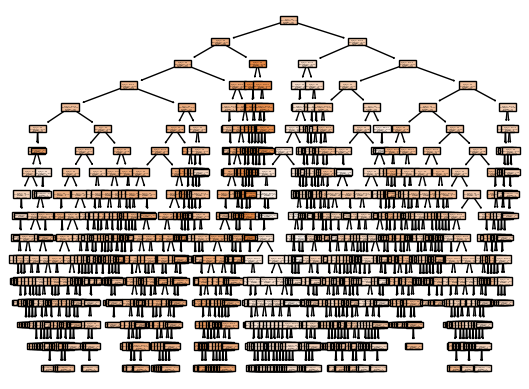

<Figure size 3000x3000 with 0 Axes>

0.9932419545888357
0.03732303192578914


In [60]:
from sklearn import tree

joint_tree = tree.DecisionTreeRegressor(max_depth=16)
bag = joint_tree.fit(X_Trainer,Y_Trainer)
tree.plot_tree(bag,filled=True)
# going to make the tree larger
plt.figure(figsize=(30,30))
plt.show()
# calculating the RMSE and R-Squared
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# actual then predicted!
predicted = bag.predict(X_Trainer)
r = r2_score(Y_Trainer, predicted )
mser = mean_squared_error(Y_Trainer, predicted, squared = False)
print(r)
print(mser)
# i thought continously rewriting the code would be tedious so I just recorded the values (max depth) and their coreesponding measures


Max depth = 2

R-Squared = 0.591671382205448

RMSE = 0.2901157273027688

Max depth = 4

R-Squared: 0.7356351687318025

RMSE: 0.23343619919846223

Max depth = 8

R-Squared: 0.8956677715939236

RMSE: 0.1466478179163223

Max depth = 16

R-Squared: 0.9932419545888357

RMSE: 0.03732303192578914

Utilzing the tree's R-Sqaured and RMSE value to determin the best tree informs us that the answer is 16. The tree that had a maximum depth of 16 had a R-Sqaured of 0.993 and RMSE of 0.0373. This numbers informs us that the model accounted for 99.3 percent of the variance is explained by our model, additionally our model has a 3.7% prediction error rate. This seems the most logical because a tree that has 16 nodes is able to garner more information to accurately predict versus a tree with only 2 nodes.


https://www.askpython.com/python/coefficient-of-determination
https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python#:~:text=sklearn.,False%20will%20return%20the%20RMSE

I was having a hard time trying to understand how to calculate the RMSE and R-Sqaured for the model so i used the built in functions from sklearn. The two different links detail how to use the functions and helped me.

Question 1.8)

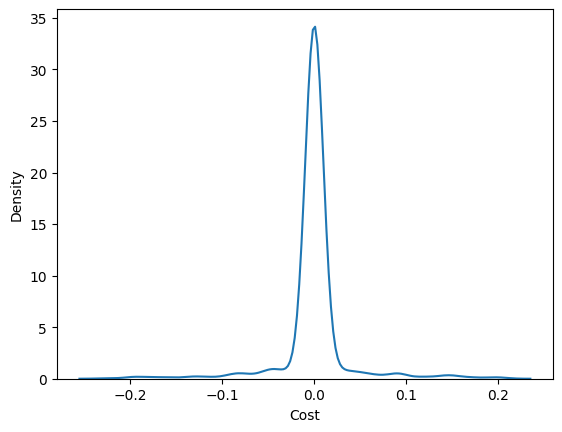

In [62]:
y_hat_cart = bag.predict(X_Tester)
residuals_bag = Y_Trainer - predicted
# computing the residual plot
sns.kdeplot(residuals_bag)
plt.show()


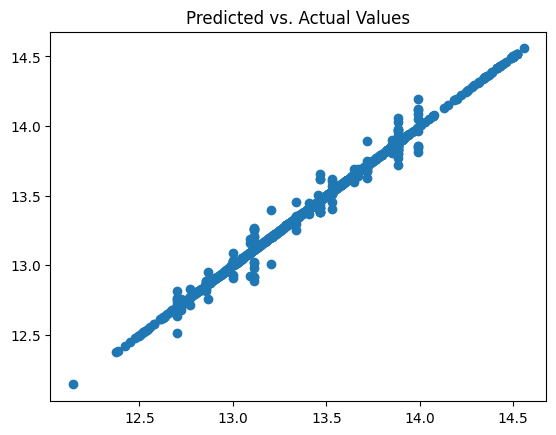

In [63]:
# computing the actual vs predicted plot
plt.scatter(x= predicted , y = Y_Trainer)
plt.title('Predicted vs. Actual Values')
plt.show()

# Interpret the previous graphs
The kernel density plot is centered at zero with a steep bell curve shape. This shape informs us that the standard deviation for the residuals is very small, thus highlighting the model's high accuracy. Additionally the very strong diagonal relationship in the Actual vs Predicted firther highlights the accuracy.


Question 1.9)


The model that has better performance on the test set is the regression tree ,that has 16 set as its maxmium depth, due to its exceptionally high R-Squared value.

Question 3

Question 3.1)

In [36]:
indonesia = pd.read_csv('./assignment4/data/contraception_hw.csv')
print(indonesia.head(10))
tab_contraception = indonesia['method'].value_counts()
print(tab_contraception)

   Unnamed: 0  age  edu  edu_spouse  numberChildren  religion  working  \
0           1   24    2           3               3         1        1   
1           2   45    1           3              10         1        1   
2           3   43    2           3               7         1        1   
3           4   42    3           2               9         1        1   
4           5   36    3           3               8         1        1   
5           6   19    4           4               0         1        1   
6           7   38    2           3               6         1        1   
7           8   21    3           3               1         1        0   
8           9   27    2           3               3         1        1   
9          10   45    1           1               8         1        1   

   spouse_occupation  standardOfLivingIndex  mediaExposure  method  
0                  2                      3              0       1  
1                  3                      4    

Most Indonesian couples in 1987 did not use any forms of contraception

In [37]:
childrenxmethod = pd.crosstab(indonesia['method'],indonesia['numberChildren'], margins = True, margins_name = 'Total')
print(childrenxmethod)

numberChildren   0    1    2    3    4    5   6   7   8   9  10  11  12  13  \
method                                                                        
1               95  143  114   70   57   44  35  18  29   5   9   6   4   0   
2                0   46   56   70   62   36  27  19   9   3   2   2   0   1   
3                2   87  106  119   78   55  30  12   9   8   0   3   0   1   
Total           97  276  276  259  197  135  92  49  47  16  11  11   4   2   

numberChildren  16  Total  
method                     
1                0    629  
2                0    333  
3                1    511  
Total            1   1473  


Couples who use birth control tend to have a smaller number of children compared to couples who do not use any contraceptives.

https://pbpython.com/pandas-crosstab.html --> I used this website to help calculate the total for each individual contraceptive method

Question 3.2)

In [38]:
indonesia_y = indonesia['method']
dropped = ['method', 'Unnamed: 0']
indonesia_x = indonesia.drop(dropped,axis = 1)
print(indonesia_x)
indonesia_x = indonesia_x.apply(maxmin)
from sklearn.model_selection import train_test_split
indX_Train, indX_Test, indY_Train, indY_Test = train_test_split(indonesia_x,indonesia_y,test_size=.2,random_state =100)

      age  edu  edu_spouse  numberChildren  religion  working  \
0      24    2           3               3         1        1   
1      45    1           3              10         1        1   
2      43    2           3               7         1        1   
3      42    3           2               9         1        1   
4      36    3           3               8         1        1   
...   ...  ...         ...             ...       ...      ...   
1468   33    4           4               2         1        0   
1469   33    4           4               3         1        1   
1470   39    3           3               8         1        0   
1471   33    3           3               4         1        0   
1472   17    3           3               1         1        1   

      spouse_occupation  standardOfLivingIndex  mediaExposure  
0                     2                      3              0  
1                     3                      4              0  
2                     3    

Question 3.3)

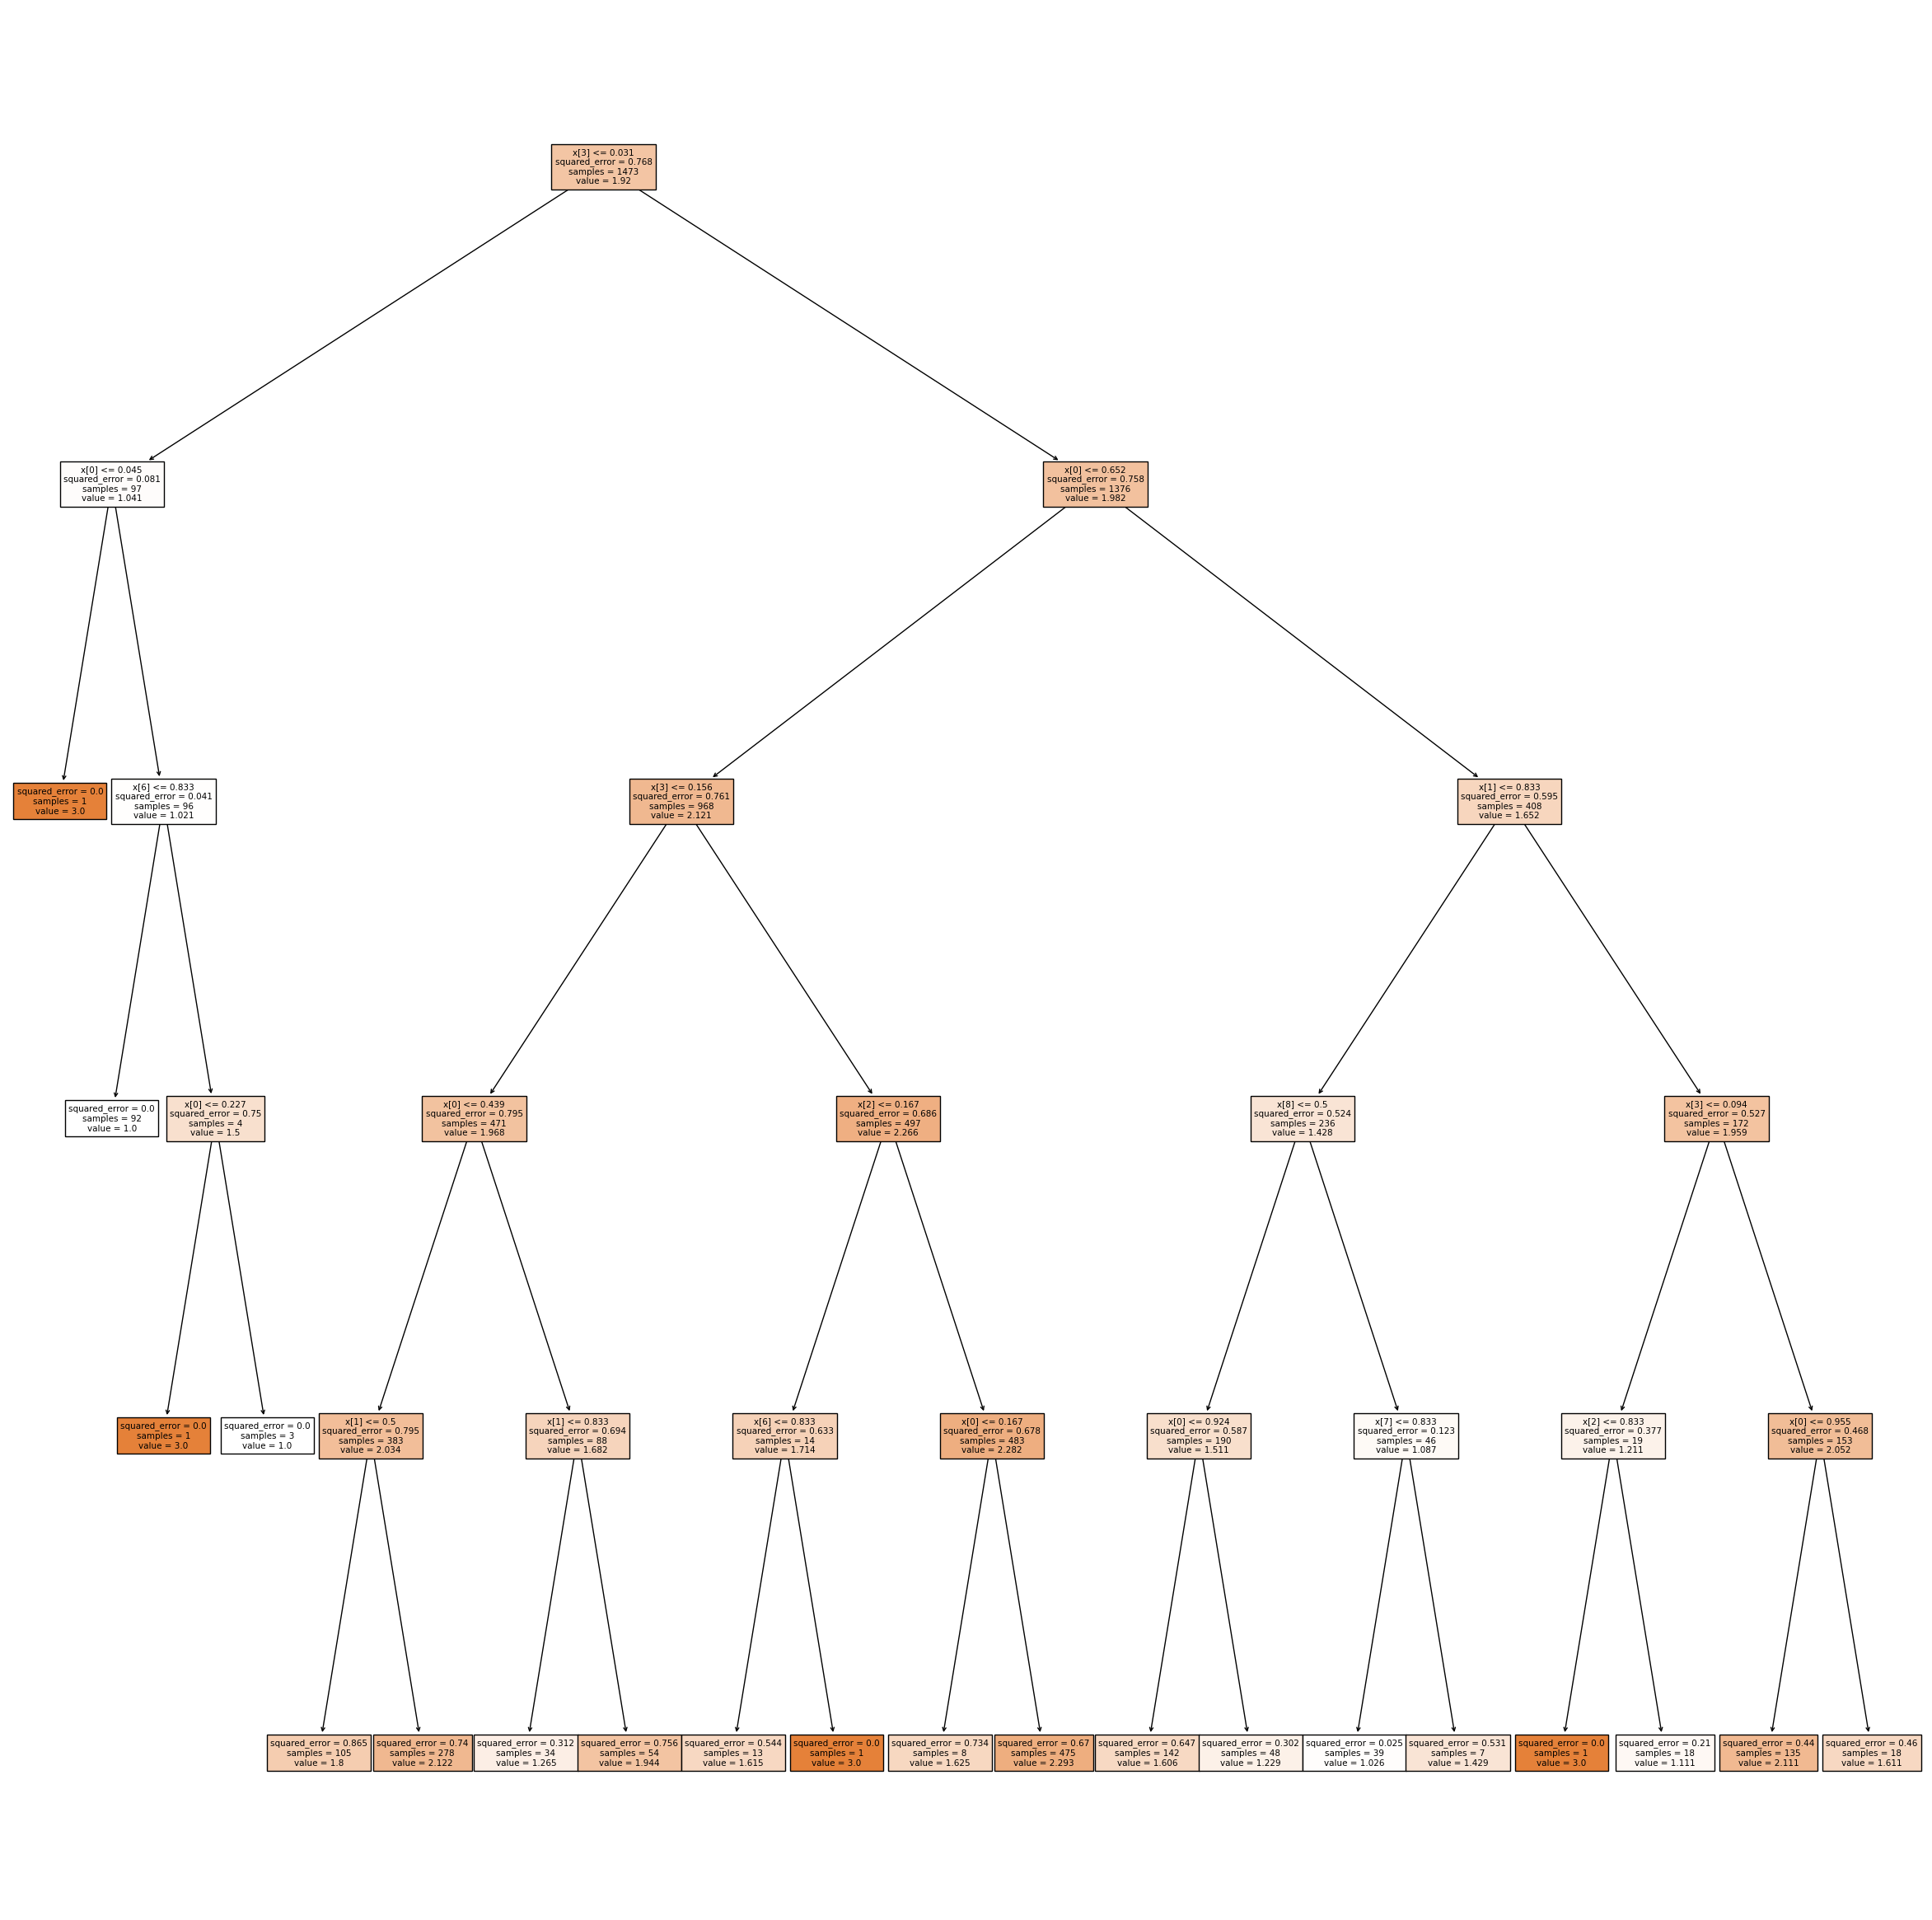

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt
cart = tree.DecisionTreeRegressor(max_depth=5)
cart = cart.fit(indonesia_x, indonesia_y)
plt.figure(figsize=(30,30))
tree.plot_tree(cart,filled=True)
plt.show()


The values that the terminal nodes take on in the regression tree take on numbers that are not in the possible range of values. For further explanation, the method values can only take on the values of 1, 2, or 3. However, our model takes on other values such as 2.122 or 1.615. What has gone wrong with our model is that we are using a continous method (regression) to predict a discrete variable (method). A classification tree would hypothetically take on better values.

Question 3.4)

[Text(0.37104837614283576, 0.9782608695652174, 'x[3] <= 0.031\ngini = 0.646\nsamples = 1473\nvalue = [629, 333, 511]'),
 Text(0.1223208932853717, 0.9347826086956522, 'x[0] <= 0.045\ngini = 0.04\nsamples = 97\nvalue = [95, 0, 2]'),
 Text(0.12072217226219024, 0.8913043478260869, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12391961430855315, 0.8913043478260869, 'x[6] <= 0.833\ngini = 0.021\nsamples = 96\nvalue = [95, 0, 1]'),
 Text(0.1223208932853717, 0.8478260869565217, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]'),
 Text(0.12551833533173462, 0.8478260869565217, 'x[4] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.12391961430855315, 0.8043478260869565, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12711705635491607, 0.8043478260869565, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6197758590002997, 0.9347826086956522, 'x[0] <= 0.652\ngini = 0.654\nsamples = 1376\nvalue = [534, 333, 509]'),
 Text(0.38103852855215825, 0.8913043478260869, 'x[1

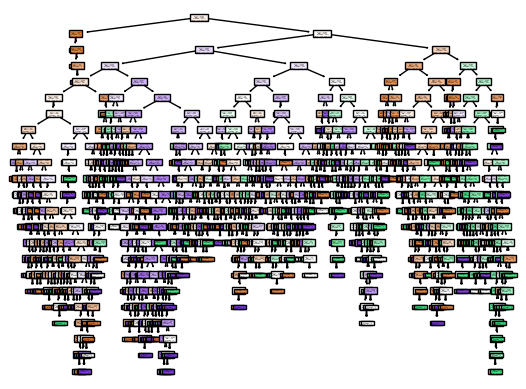

In [40]:
# creating decision tree
contraception_methods = tree.DecisionTreeClassifier()
contraception_methods = contraception_methods.fit(indonesia_x, indonesia_y)
tree.plot_tree(contraception_methods,filled = True)

Due to python's different system of compiling of decision trees than R, it is quite difficult to interpret this currently. (We discussed this during office hours)


Question 3.5)

In [41]:
y_hat = contraception_methods.predict(indX_Test)
matrix = pd.crosstab(indY_Test,y_hat)
print(matrix)

col_0     1   2   3
method             
1       126   0   1
2         2  62   0
3         5   8  91


In [42]:
# going to compute the overall accuracy
# formula =
# TP + TN /
# ALL of the data
accuracy = (matrix.iloc[0,0]+matrix.iloc[1,1]+matrix.iloc[2,2])/(matrix.iloc[0,0]+matrix.iloc[1,1]+matrix.iloc[2,2]+matrix.iloc[1,0]+matrix.iloc[2,0]+matrix.iloc[0,1]+matrix.iloc[2,1]+matrix.iloc[0,2]+matrix.iloc[1,2])
print('The overall accuracy of the model is: ', accuracy, '\n')

The overall accuracy of the model is:  0.9457627118644067 



In [43]:
one = matrix.iloc[1,0]
two = matrix.iloc[2,0]
three = matrix.iloc[0,1]
four = matrix.iloc[0,2]
FIVE = matrix.iloc[1,2]
six = matrix.iloc[2,1]
print(one)
print(two)
print(three)
print(four)
print(FIVE)
print(six)
# REMEMBER THAT ILOC GOES [ROW,COLUMN] !!!!!

2
5
0
1
0
8


In [44]:
#accuracy for method 1
method1_accuracy = (matrix.iloc[0,0])/(matrix.iloc[0,0]+matrix.iloc[0,1]+matrix.iloc[0,2])
print(method1_accuracy)

0.9921259842519685


In [45]:
#accuracy for method 2
method2_accuracy = (matrix.iloc[1,1])/(matrix.iloc[1,1]+matrix.iloc[1,0]+matrix.iloc[1,2])
print(method2_accuracy)

0.96875


In [46]:
#accuracy for method 3
method2_accuracy = (matrix.iloc[2,2])/(matrix.iloc[2,2]+matrix.iloc[2,0]+matrix.iloc[2,1])
print(method2_accuracy)

0.875


Question 3.6)

It is not ideal to use a linear probability model for this exercise because linear regression is suitable for predicting continuous numerical data, not discrete categorical data. Since we were trying to project an Indonesian couple's contraceptive methods which can only take on three different values which correlates to a categorical contraceptive model, linear regression would give us values that don't specifically correlate to the data we are trying to plot. As previously seen, linear models would give us 1.04 or 2.921, which doesnt fit our categories. While one could round the variables up or down, this would'nt account for the nuance that makes one couple a 1.04 versus a simple 1.